In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# from joblib import Parallel, delayed
# import numpy as np

In [2]:
path = '/Users/abhisheksharma/Desktop/KAIS/Scripts/Clustering Measures/Rules/'
tables = np.loadtxt(path+'rules_001_abalone.data.csv', skiprows=1,delimiter=',', dtype=int)

In [3]:
print(tables.shape)
tables

(1004, 4)


array([[ 231,  458,  718, 2770],
       [ 231,  718,  458, 2770],
       [ 240,  449,  764, 2724],
       ...,
       [ 922,  485,  420, 2350],
       [ 299, 1108, 1229, 1541],
       [ 299, 1229, 1108, 1541]])

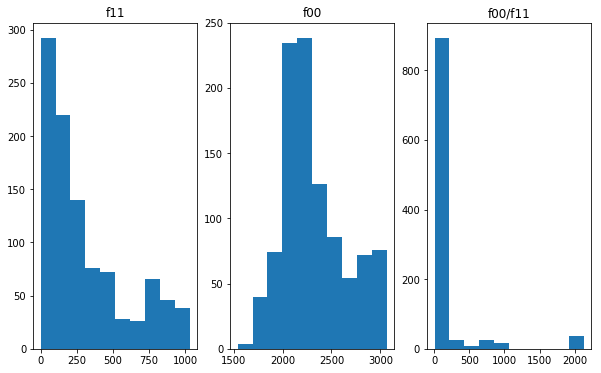

In [4]:
plt.figure(figsize=(10,6))
plt.subplot(131)
plt.hist(tables[:,0]); plt.title('f11');# plt.show();
plt.subplot(132)
plt.hist(tables[:,3]); plt.title('f00');# plt.show();
plt.subplot(133)
plt.hist(tables[:,3]/tables[:,0]); plt.title('f00/f11');# plt.show();

2 59885379.532254905
Dense clusters []
Sparse clusters [(0, 800, 176.64846468976626), (1, 204, 3.7485273525155263)]

3 35285353.541005455
Dense clusters []
Sparse clusters [(0, 396, 10.305805191347119), (1, 196, 3.6106023702741195), (2, 412, 333.23954954218203)]

4 27454310.681938443
Dense clusters []
Sparse clusters [(0, 190, 3.5735251556024155), (1, 356, 383.29080387246375), (2, 326, 10.441227776055209), (3, 132, 11.735872110383678)]

5 21456566.269828264
Dense clusters []
Sparse clusters [(0, 386, 291.03507113236594), (1, 192, 3.5852648389748722), (2, 174, 11.128374265041087), (3, 120, 5.367417694027993), (4, 132, 200.569210455676)]

6 16251703.177148607
Dense clusters []
Sparse clusters [(0, 348, 350.32569405842537), (1, 82, 4.013022766387572), (2, 216, 11.526663065987467), (3, 120, 5.367417694027993), (4, 118, 138.09799625361873), (5, 120, 3.43040857572252)]

7 12047583.899885805
Dense clusters []
Sparse clusters [(0, 80, 3.963967704916631), (1, 254, 527.6292978081742), (2, 112, 5

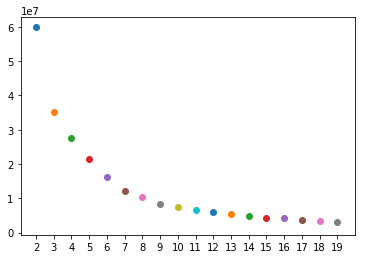

In [5]:
def cluster_tables(k, tables):
    metric = 'euclidean'
    n_clusters = k
    km = KMeans(n_clusters=n_clusters, n_jobs=-1)
    clusters = km.fit_predict(tables[:,[0,3]])
    cost = km.inertia_

    print(k, cost)

    # Search for dense clusters
    print('Dense clusters', [(cname, len(tables[clusters==cname]), (tables[clusters==cname,3]/tables[clusters==cname,0]).mean())
                                for cname in range(n_clusters)
                                if (tables[clusters==cname,3]/tables[clusters==cname,0]).mean() < 1 ])
    # Search for sparse clusters
    print('Sparse clusters', [(cname, len(tables[clusters==cname]), (tables[clusters==cname,3]/tables[clusters==cname,0]).mean())
                                for cname in range(n_clusters)
                                if (tables[clusters==cname,3]/tables[clusters==cname,0]).mean() > 2 ])
    print('')
    plt.scatter(k, cost)

for k in range(2,20):
    cluster_tables(k, tables)

plt.xticks(range(2,20))
plt.show()

In [6]:
n_clusters_dense = 9
f00_f11_ratio = 1

km_dense = KMeans(n_clusters=n_clusters_dense, n_jobs=-1)
clusters_dense = km_dense.fit_predict(tables[:,[0,3]])
print([(cname, len(tables[clusters_dense==cname]), (tables[clusters_dense==cname,3]/tables[clusters_dense==cname,0]).mean())
                                for cname in range(n_clusters_dense)
                                if (tables[clusters_dense==cname,3]/tables[clusters_dense==cname,0]).mean() < f00_f11_ratio ])

final_clusters_dense = [cname for cname in range(n_clusters_dense)
                                if (tables[clusters_dense==cname,3]/tables[clusters_dense==cname,0]).mean() < f00_f11_ratio ]

[]


In [7]:
tables_dense = tables[np.any(np.array(final_clusters_dense)[:,None] == clusters_dense, axis=0)]

In [8]:
tables_dense.shape

(0, 4)

In [14]:
n_clusters_sparse = 9
f00_f11_ratio = 100

km_sparse = KMeans(n_clusters=n_clusters_sparse, n_jobs=-1)
clusters_sparse = km_sparse.fit_predict(tables[:,[0,3]])
print([(cname, len(tables[clusters_sparse==cname]), (tables[clusters_sparse==cname,3]/tables[clusters_sparse==cname,0]).mean())
                                for cname in range(n_clusters_sparse)
                                if (tables[clusters_sparse==cname,3]/tables[clusters_sparse==cname,0]).mean() > f00_f11_ratio ])

final_clusters_sparse = [cname for cname in range(n_clusters_sparse)
                                if (tables[clusters_sparse==cname,3]/tables[clusters_sparse==cname,0]).mean() > f00_f11_ratio ]

[(6, 242, 552.6272850217899)]


In [15]:
tables_sparse = tables[np.any(np.array(final_clusters_sparse)[:,None] == clusters_sparse, axis=0)]

In [16]:
tables_sparse.shape

(242, 4)

In [17]:
len(tables_dense), (tables_dense[:,3]/tables_dense[:,0]).mean(), len(tables_sparse), (tables_sparse[:,3]/tables_sparse[:,0]).mean()

/anaconda3/envs/hw3_589/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.
/anaconda3/envs/hw3_589/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0, nan, 242, 552.6272850217899)

In [18]:
import sys
import scipy.cluster as sc
from scipy.spatial.distance import squareform

sys.path.insert(0, '../../scripts')
import IM_rank_correlations as IMR;
from Measures import map_measures_to_indices;
import compute_invariance as compute_invariance;


In [19]:
tables_analysis = tables_sparse

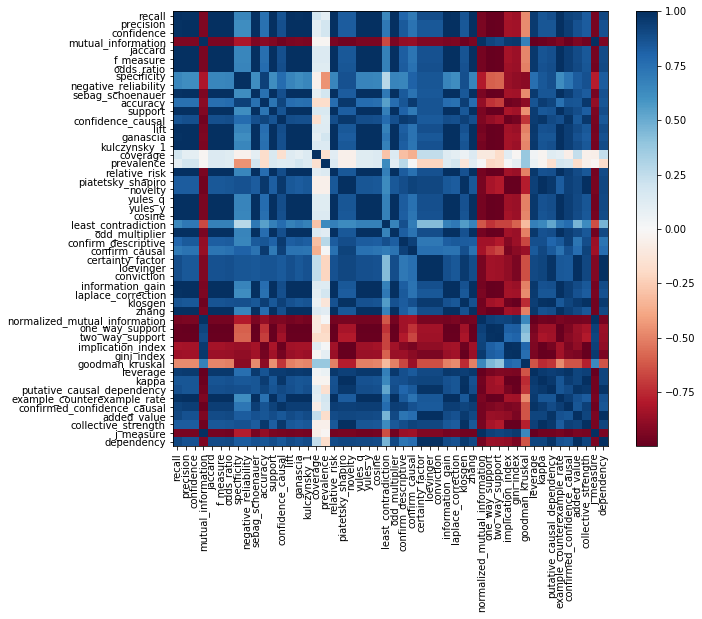

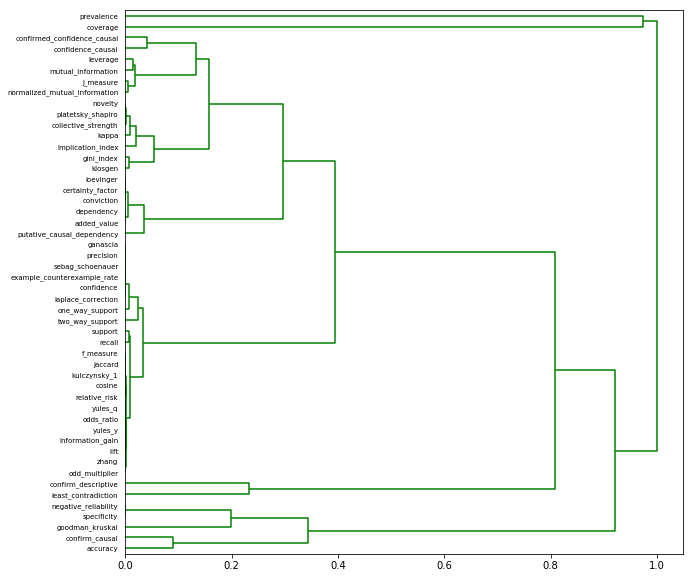

In [20]:
(measures_dict, measures_arr) = map_measures_to_indices();
(ranks_matrix, scores_matrix) = IMR.create_ranks_matrix(tables_analysis, measures_arr);
ranks_matrix.visualize()

In [21]:
dist = 1 - ranks_matrix.corr_spearman**2

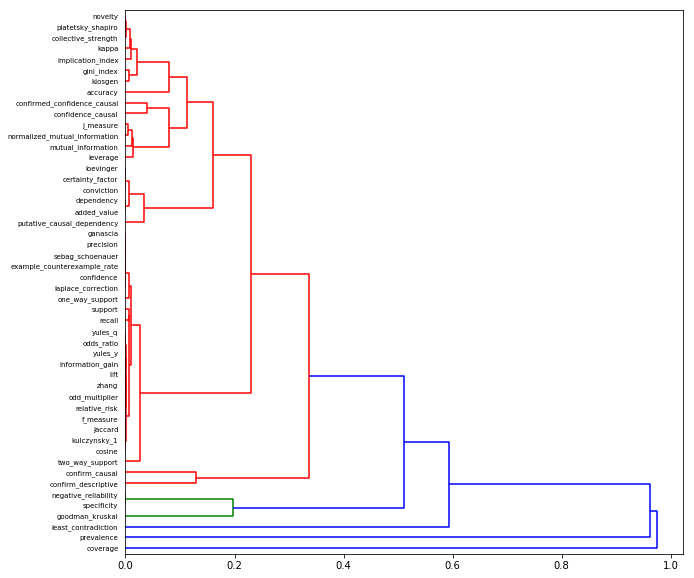

In [22]:
Z = sc.hierarchy.linkage(squareform(dist.round(8)), method='average')
# plt.figure(figsize=(10,6))
# def llf(id):
#     return measures_arr[id]
ranks_matrix.show_dendrogram(linkage_method='average', color_threshold=0.5)
# sc.hierarchy.dendrogram(Z, leaf_label_func=llf)
# plt.show()

In [23]:
def form_clusters(n_clusters=10, ranks_matrix=ranks_matrix):
    # n_clusters = 10;
    clusters = ranks_matrix.form_clusters(n_clusters, method="average");
    return clusters

#prints the measures list in each of the clusters
def print_cluster_set(clusters, ma):
    for idx, cluster in enumerate(clusters):
        print(len(cluster), cluster);        
        print(ma[cluster]);

#forms a cluster vector corresponding to the lengths of the clusters
def form_cluster_set(clusters):
    cluster_vector = np.empty(len(clusters), int);
    for idx, cluster in enumerate(clusters):
        cluster_vector[idx] = len(cluster);
    return cluster_vector;

2 588.3086918857397

3 496.02777598311985

4 440.239212420405

5 305.58446839014516

6 249.05607781972247

7 46.03905743093272

8 45.24651652000234

9 18.168602611810584



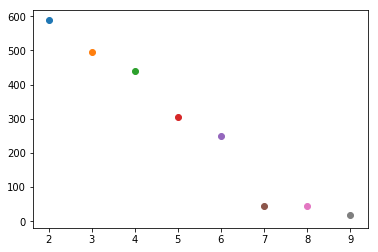

In [24]:
for k in range(2,10):
    n_clusters = k
    rm = IMR.ranks(scores_matrix, measures_arr);
    rm = ranks_matrix
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    clusters = form_clusters(n_clusters, rm);
    cost = 0
    
    for c in range(n_clusters):
        for i in clusters[c]:
            cost += dist[i,clusters[c]].sum()
    # Search for dense clusters
    print(k, cost)

#     print('Dense clusters', [(cname, len(tables[clusters==cname]), (tables[clusters==cname,3]/tables[clusters==cname,0]).mean())
#                                 for cname in range(n_clusters)
#                                 if (tables[clusters==cname,3]/tables[clusters==cname,0]).mean() < .2 ])
#     print('Sparse clusters', [(cname, len(tables[clusters==cname]), (tables[clusters==cname,3]/tables[clusters==cname,0]).mean())
#                                 for cname in range(n_clusters)
#                                 if (tables[clusters==cname,3]/tables[clusters==cname,0]).mean() > 10 ])
    print('')
    plt.scatter(k, cost)
#     plt.xticks(range(2,20))

In [28]:
def cluster_set_2(n_clusters):
    rm = IMR.ranks(scores_matrix, measures_arr);
    rm = ranks_matrix
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    clusters = form_clusters(n_clusters, rm);
    return (clusters, md, ma);

(clusters_2, measures_dict_2, measures_arr_2) = cluster_set_2(7);
print_cluster_set(clusters_2, measures_arr_2)

22 [ 0  1  2  4  5  6  9 11 13 14 15 18 21 22 23 25 31 32 34 36 37 44]
['recall' 'precision' 'confidence' 'jaccard' 'f_measure' 'odds_ratio'
 'sebag_schoenauer' 'support' 'lift' 'ganascia' 'kulczynsky_1'
 'relative_risk' 'yules_q' 'yules_y' 'cosine' 'odd_multiplier'
 'information_gain' 'laplace_correction' 'zhang' 'one_way_support'
 'two_way_support' 'example_counterexample_rate']
20 [ 3 10 12 19 20 28 29 30 33 35 38 39 41 42 43 45 46 47 48 49]
['mutual_information' 'accuracy' 'confidence_causal' 'piatetsky_shapiro'
 'novelty' 'certainty_factor' 'loevinger' 'conviction' 'klosgen'
 'normalized_mutual_information' 'implication_index' 'gini_index'
 'leverage' 'kappa' 'putative_causal_dependency'
 'confirmed_confidence_causal' 'added_value' 'collective_strength'
 'j_measure' 'dependency']
3 [ 7  8 40]
['specificity' 'negative_reliability' 'goodman_kruskal']
1 [16]
['coverage']
1 [17]
['prevalence']
1 [24]
['least_contradiction']
2 [26 27]
['confirm_descriptive' 'confirm_causal']


In [29]:
def makecsv(arr):
    for i in arr:
        for j in i:
            print(j, end=',')
        print('')

In [30]:
def return_homogeneity(cluster_set, measures_dict):

    #old properties
    (properties_array, property_names, support_array, entropy_array) = compute_invariance.compute_property_vectors(measures_dict);

#     # new properties
    (properties_array, property_names) = compute_invariance.compute_new_property_vectors(measures_dict);
# mapping the properties array to the combination of the properties
#     (properties_array, property_names) = compute_invariance.map_UN_properties_to_combinations(properties_array);
    (support_array, entropy_array) = compute_invariance.compute_supports_updated(properties_array);

    cluster_property_array = compute_invariance.compute_property_frequencies_in_cluster_set_updated(properties_array, cluster_set);
    cluster_vector = form_cluster_set(cluster_set);
    print(cluster_vector,'\n');
#     print(properties_array)
    for idx, property_vector in enumerate(cluster_property_array):
        # property_vector is (n_prop_states, n_clusters)
        homo = compute_invariance.compute_homogeneity(property_vector, cluster_vector)
        # Property names

        if property_names[idx] == "UNZR_f11" or property_names[idx] == "UNZR_f00":
            print(property_names[idx]);
            print("Total [N, P, Y] count: ",property_vector.sum(1).astype(int))

            print("Clusterwise [N, P, Y] count:") #shape = (n_clusters x [N, P, Y])
            makecsv(property_vector.T.astype(int))

return_homogeneity(clusters_2, measures_dict_2);

[22 20  3  1  1  1  2] 

UNZR_f11
Total [N, P, Y] count:  [10 15 25]
Clusterwise [N, P, Y] count:
2,4,16,
5,9,6,
3,0,0,
0,1,0,
0,1,0,
0,0,1,
0,0,2,
UNZR_f00
Total [N, P, Y] count:  [23 18  9]
Clusterwise [N, P, Y] count:
12,9,1,
6,9,5,
1,0,2,
1,0,0,
1,0,0,
1,0,0,
1,0,1,
